In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
import seaborn as sns 
from tqdm import tqdm 
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session
train_df = pd.read_csv('Lab3_data.csv')
train_df

Saving Lab3_data.csv to Lab3_data.csv


,y,x1,x2
0,1,71.0,140
1,1,74.0,185
2,1,70.0,145
3,1,67.0,145
4,1,72.0,170
...,...,...,...
90,1,70.0,155
91,1,75.0,180
92,1,70.0,175
93,1,68.0,165


In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session
test_df = pd.read_csv('Lab3data.csv')
test_df


Saving Lab3data.csv to Lab3data.csv


,y,x1,x2
0,1,71,140
1,1,74,185
2,1,70,145
3,1,67,145
4,1,72,170
5,1,71,215
6,0,62,105
7,1,74,170
8,1,73,200
9,1,70,160


In [ ]:
class logistic:

    def __init__(self,X,y, learning_rate = 0.000001, tol = 0.0000001, maxIter = 50000, index = []):

        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.tol = tol
        self.maxIter = maxIter
        self.error = []
        self.iter_count = []
        self.index = index

    def addBias(self,X):
        return np.column_stack([np.ones([X.shape[0],1]),X])

    def sigmoid(self,Z):
        sig = 1 / (1+np.exp(-Z))
        return sig

    def costFunction(self,X,y):
        sigmoid=self.sigmoid(X.dot(self.w))
        pred_=y*np.log(sigmoid)+(1-y)*np.log(1-sigmoid)
        #pred_ =  np.log(np.ones(X.shape[0]) +np.exp(-(X.dot(self.w)))) - X.dot(self.w).dot(y)
        cost = pred_.sum()
        return cost

    def gradient(self,X,y):
        sigmoid = self.sigmoid(X.dot(self.w))
        grad = (sigmoid - y).dot(X)
        return grad

    def gradientDescent(self,X,y):
        costSequence=[]
        prev_error = float('inf')
        for i in tqdm(range(self.maxIter)):
            self.w = self.w - self.learning_rate *( self.gradient(X,y))
            curr = self.costFunction(X,y)
            diff = prev_error - curr
            #prev_error= curr
            costSequence.append(abs(curr))

            if abs(diff) < self.tol:
                print("stopped")
                break
        self.plotCost(costSequence)


    def plotCost(self, costSequence):
        axis=list(range(0, len(costSequence),1))
        fig, ax = plt.subplots()
        ax.plot(axis, costSequence)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Cost Function')
        ax.set_title('Cost Function')
        ax.grid()
        plt.show()
        
    def predict(self,X):
        pred = self.sigmoid(X.dot(self.w))
        return np.where(pred > 0.5,1,0)
    
    def evaluate(self,y,y_hat):
        y = (y==1)
        y_hat = (y_hat==1)
        
        accuracy = (y==y_hat).sum() / y.size
        precision = (y&y_hat).sum() / y_hat.sum()
        recall = (y&y_hat).sum() / y.sum()
        
        return recall, precision, accuracy
    
    def remove_index(self):
        for index in self.index:
            self.X_train = np.delete(self.X_train,index, axis = 0)
            print(self.X_train.shape)
            self.y_train = np.delete(self.y_train,index, axis = 0)
            print(self.y_train.shape)
        
    def fit(self):
        
        self.X_train , self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.y,test_size=0.3)

        if self.X_train.shape[0] >= max(self.index, default = 0) and len(self.index) !=0 :
            self.remove_index()
        else:
            print(self.X_train.shape)
            print("no record of the following index exists...")
        
        self.w = np.ones(self.X_train.shape[1], dtype=np.float64)*0
        
        self.gradientDescent(self.X_train,self.y_train)
        
        print(self.w)
        
        y_hat_train = self.predict(self.X_train)
        recall , precision, accuracy = self.evaluate(self.y_train, y_hat_train)
        
        print("accuracy:", accuracy)
        print("precision:", precision)
        print("recall:", recall)
        
    
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()


        

In [ ]:
X_train,y_train = train_df.values[:,1:], train_df.values[:,0]

(66, 2)
no record of the following index exists...


100%|██████████| 50000/50000 [00:02<00:00, 22610.13it/s]


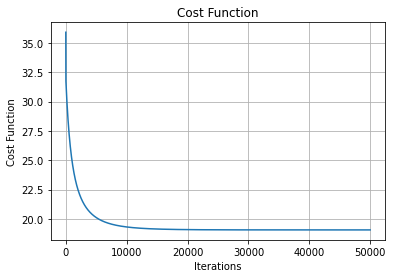

[-0.30821787  0.14846322]
accuracy: 0.8787878787878788
precision: 0.8909090909090909
recall: 0.9607843137254902


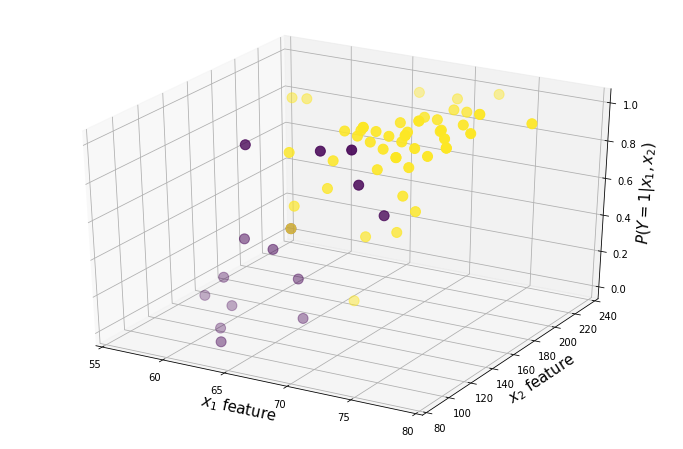

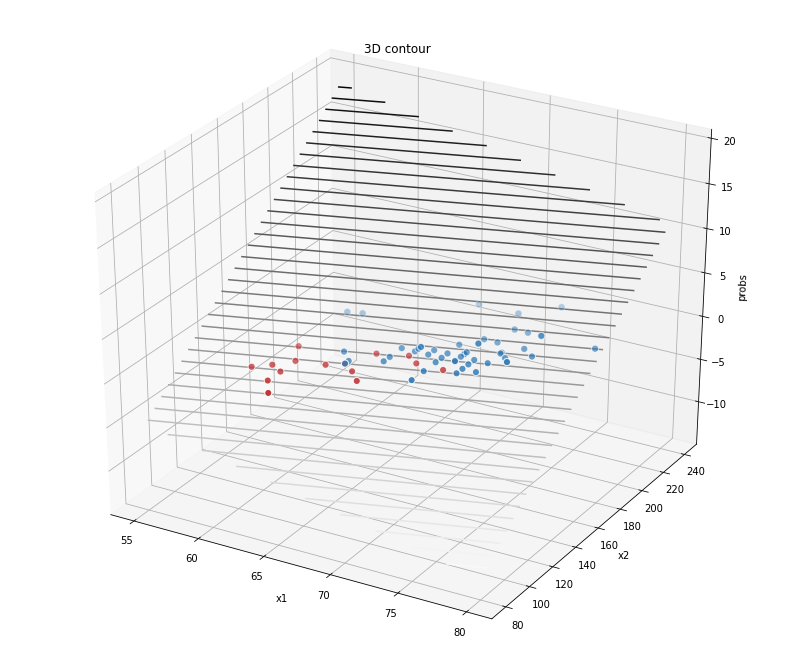

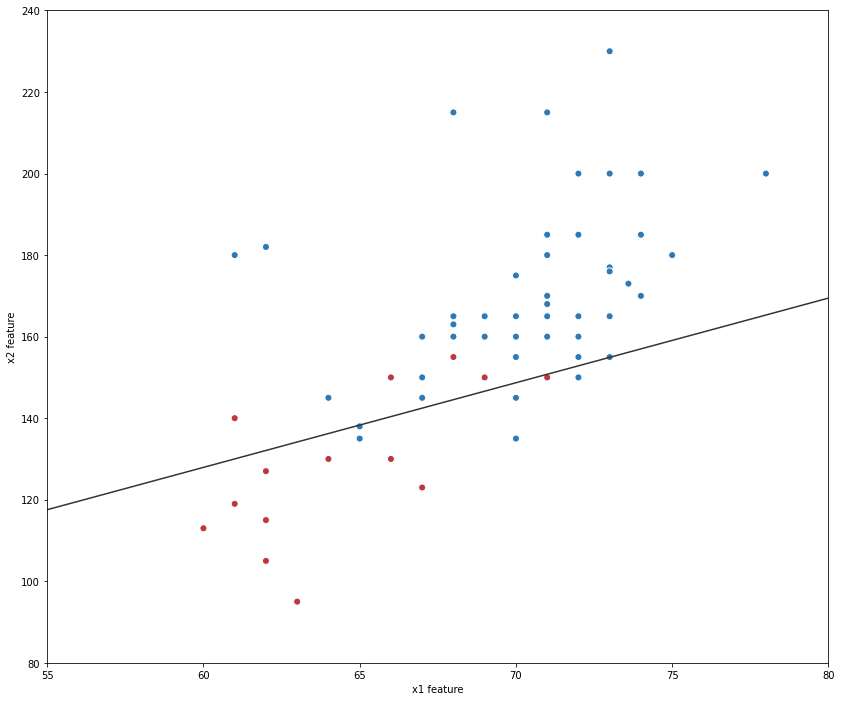

In [ ]:
lr1 = logistic(X_train,y_train, index=[])
lr1.fit()
lr1.plot()
lr1.plot3D()
lr1.scatterPlt()

(65, 2)
(65,)
(64, 2)
(64,)


100%|██████████| 50000/50000 [00:02<00:00, 22552.65it/s]


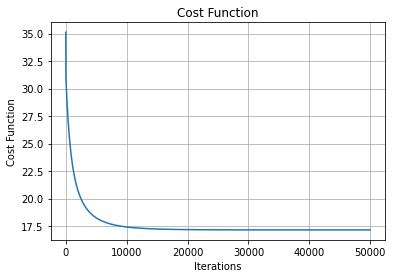

[-0.31853117  0.15386093]
accuracy: 0.890625
precision: 0.9038461538461539
recall: 0.9591836734693877


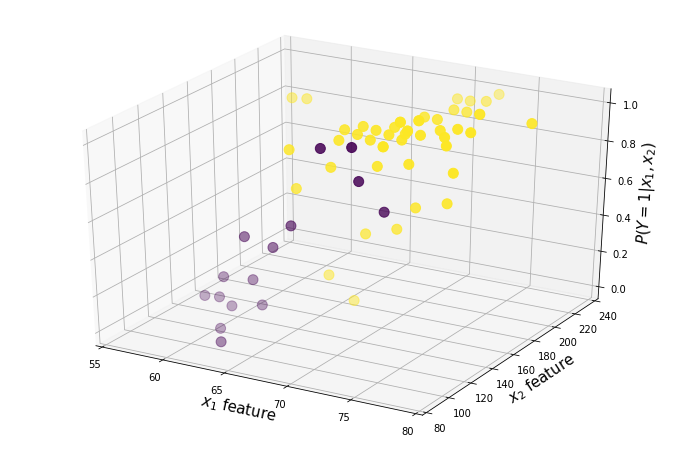

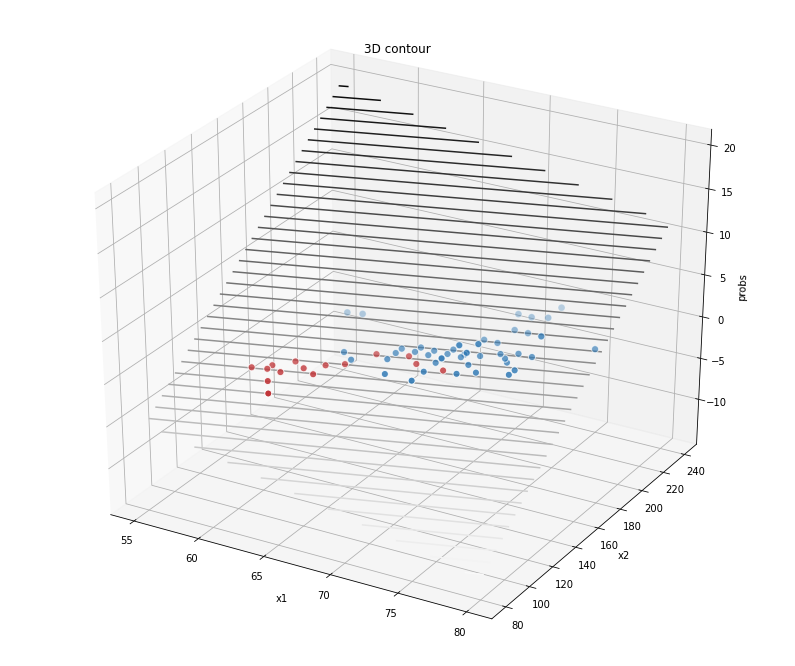

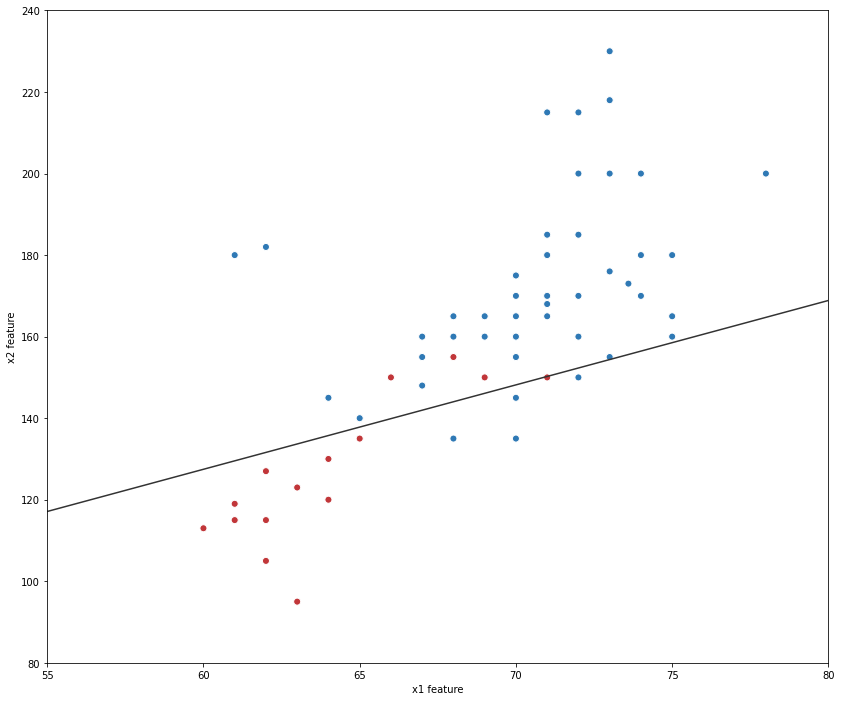

In [ ]:
lr2 = logistic(X_train,y_train, index= [1,39])
lr2.fit()
lr2.plot()
lr2.plot3D()
lr2.scatterPlt()

From the plots it is evident that the decision boundary moves a little down after removing the point [1,39]. These points are not outliers so they dont have a drastic effect on the results but the precision,accuracy increases a bit whereas recall reduces